<h1>Trabalho XYZ</h1>
<h5>Disciplina XYZ</h5>
<h5>Professora ..</h5>
<h5>Alunos: </h5>
<br>
<p>objetivo do trabalho... </p>
<p>Metodologia</p>
<p>Resultados</p>

## 1. Inicialização

In [2]:
import os
import pandas as pd
pd.set_option("display.max_columns", None)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

path = "/content/drive/MyDrive/ml-project/data" #pasta do projeto
FILE = "smart-contract-dataset.csv" #nome do arquivo
SEED = 78 #seed para usar nas divisões de dados
CV_FOLDS = 5 #folds para cross validation
SCORING_METRIC = 'precision' #qual estimativa priorizar

## 2. Prévia dos dados carregados

In [3]:
data = pd.read_csv(os.path.join(FILE)) #carrega os dados
data

,Unnamed: 0,hash_id,label,bytecode_len,Weight bytecode_character_6,Weight bytecode_character_0,Weight bytecode_character_8,Weight bytecode_character_4,Weight bytecode_character_5,Weight bytecode_character_2,Weight bytecode_character_1,Weight bytecode_character_a,Weight bytecode_character_7,Weight bytecode_character_3,Weight bytecode_character_f,Weight bytecode_character_9,Weight bytecode_character_b,Weight bytecode_character_c,Weight bytecode_character_d,Weight bytecode_character_e,bytecode_character_6,bytecode_character_0,bytecode_character_8,bytecode_character_4,bytecode_character_5,bytecode_character_2,bytecode_character_1,bytecode_character_a,bytecode_character_7,bytecode_character_3,bytecode_character_f,bytecode_character_9,bytecode_character_b,bytecode_character_c,bytecode_character_d,bytecode_character_e,bytecode_entropy,ast_len_exportedSymbols,ast_id,ast_nodetype,ast_src,ast_len_nodes,Opcode weight STOP,Opcode weight ADD,Opcode weight MUL,Opcode weight SUB,Opcode weight DIV,Opcode weight SDIV,Opcode weight MOD,Opcode weight SMOD,Opcode weight ADDMOD,Opcode weight MULMOD,Opcode weight EXP,Opcode weight SIGNEXTEND,Opcode weight LT,Opcode weight GT,Opcode weight SLT,Opcode weight SGT,Opcode weight EQ,Opcode weight ISZERO,Opcode weight AND,Opcode weight OR,Opcode weight XOR,Opcode weight NOT,Opcode weight BYTE,Opcode weight SHL,Opcode weight SHR,Opcode weight SAR,Opcode weight SHA3,Opcode weight ADDRESS,Opcode weight BALANCE,Opcode weight ORIGIN,Opcode weight CALLER,Opcode weight CALLVALUE,Opcode weight CALLDATALOAD,Opcode weight CALLDATASIZE,Opcode weight CALLDATACOPY,Opcode weight CODESIZE,Opcode weight CODECOPY,Opcode weight GASPRICE,Opcode weight EXTCODESIZE,Opcode weight EXTCODECOPY,Opcode weight RETURNDATASIZE,Opcode weight RETURNDATACOPY,Opcode weight BLOCKHASH,Opcode weight COINBASE,Opcode weight TIMESTAMP,Opcode weight NUMBER,Opcode weight DIFFICULTY,Opcode weight GASLIMIT,Opcode weight POP,Opcode weight MLOAD,Opcode weight MSTORE,Opcode weight MSTORE8,Opcode weight SLOAD,Opcode weight SSTORE,Opcode weight JUMP,Opcode weight JUMPI,Opcode weight PC,Opcode weight MSIZE,Opcode weight GAS,Opcode weight JUMPDEST,Opcode weight PUSH1,Opcode weight PUSH2,Opcode weight PUSH3,Opcode weight PUSH4,Opcode weight PUSH5,Opcode weight PUSH6,Opcode weight PUSH7,Opcode weight PUSH8,Opcode weight PUSH9,Opcode weight PUSH10,Opcode weight PUSH11,Opcode weight PUSH12,Opcode weight PUSH13,Opcode weight PUSH14,Opcode weight PUSH15,Opcode weight PUSH16,Opcode weight PUSH17,Opcode weight PUSH18,Opcode weight PUSH19,Opcode weight PUSH20,Opcode weight PUSH21,Opcode weight PUSH22,Opcode weight PUSH23,Opcode weight PUSH24,Opcode weight PUSH25,Opcode weight PUSH26,Opcode weight PUSH27,Opcode weight PUSH28,Opcode weight PUSH29,Opcode weight PUSH30,Opcode weight PUSH31,Opcode weight PUSH32,Opcode weight DUP1,Opcode weight DUP2,Opcode weight DUP3,Opcode weight DUP4,Opcode weight DUP5,Opcode weight DUP6,Opcode weight DUP7,Opcode weight DUP8,Opcode weight DUP9,Opcode weight DUP10,Opcode weight DUP11,Opcode weight DUP12,Opcode weight DUP13,Opcode weight DUP14,Opcode weight DUP15,Opcode weight DUP16,Opcode weight SWAP1,Opcode weight SWAP2,Opcode weight SWAP3,Opcode weight SWAP4,Opcode weight SWAP5,Opcode weight SWAP6,Opcode weight SWAP7,Opcode weight SWAP8,Opcode weight SWAP9,Opcode weight SWAP10,Opcode weight SWAP11,Opcode weight SWAP12,Opcode weight SWAP13,Opcode weight SWAP14,Opcode weight SWAP15,Opcode weight SWAP16,Opcode weight LOG0,Opcode weight LOG1,Opcode weight LOG2,Opcode weight LOG3,Opcode weight LOG4,Opcode weight CREATE,Opcode weight CALL,Opcode weight CALLCODE,Opcode weight RETURN,Opcode weight DELEGATECALL,Opcode weight STATICCALL,Opcode weight REVERT,Opcode weight INVALID,Opcode weight SELFDESTRUCT,from,require,dev,internal,string,view,mapping,sub,emit,length,pure,will,not,approve,external,memory,eth,else,can,calls,data,q,Weight bytecode_character__,Weight bytecode_character_<,Weight bytecode_character_s,Weight bytecode_character_t,We

<p>Quantitivos de instancias por rótulo</p>

In [4]:
data.label.value_counts()

label
0    26915
1     9756
Name: count, dtype: int64

<p>Descrição dos dados</p>

In [5]:
data.describe()

,Unnamed: 0,label,bytecode_len,Weight bytecode_character_6,Weight bytecode_character_0,Weight bytecode_character_8,Weight bytecode_character_4,Weight bytecode_character_5,Weight bytecode_character_2,Weight bytecode_character_1,Weight bytecode_character_a,Weight bytecode_character_7,Weight bytecode_character_3,Weight bytecode_character_f,Weight bytecode_character_9,Weight bytecode_character_b,Weight bytecode_character_c,Weight bytecode_character_d,Weight bytecode_character_e,bytecode_character_6,bytecode_character_0,bytecode_character_8,bytecode_character_4,bytecode_character_5,bytecode_character_2,bytecode_character_1,bytecode_character_a,bytecode_character_7,bytecode_character_3,bytecode_character_f,bytecode_character_9,bytecode_character_b,bytecode_character_c,bytecode_character_d,bytecode_character_e,bytecode_entropy,ast_len_exportedSymbols,ast_id,ast_len_nodes,Opcode weight STOP,Opcode weight ADD,Opcode weight MUL,Opcode weight SUB,Opcode weight DIV,Opcode weight SDIV,Opcode weight MOD,Opcode weight SMOD,Opcode weight ADDMOD,Opcode weight MULMOD,Opcode weight EXP,Opcode weight SIGNEXTEND,Opcode weight LT,Opcode weight GT,Opcode weight SLT,Opcode weight SGT,Opcode weight EQ,Opcode weight ISZERO,Opcode weight AND,Opcode weight OR,Opcode weight XOR,Opcode weight NOT,Opcode weight BYTE,Opcode weight SHL,Opcode weight SHR,Opcode weight SAR,Opcode weight SHA3,Opcode weight ADDRESS,Opcode weight BALANCE,Opcode weight ORIGIN,Opcode weight CALLER,Opcode weight CALLVALUE,Opcode weight CALLDATALOAD,Opcode weight CALLDATASIZE,Opcode weight CALLDATACOPY,Opcode weight CODESIZE,Opcode weight CODECOPY,Opcode weight GASPRICE,Opcode weight EXTCODESIZE,Opcode weight EXTCODECOPY,Opcode weight RETURNDATASIZE,Opcode weight RETURNDATACOPY,Opcode weight BLOCKHASH,Opcode weight COINBASE,Opcode weight TIMESTAMP,Opcode weight NUMBER,Opcode weight DIFFICULTY,Opcode weight GASLIMIT,Opcode weight POP,Opcode weight MLOAD,Opcode weight MSTORE,Opcode weight MSTORE8,Opcode weight SLOAD,Opcode weight SSTORE,Opcode weight JUMP,Opcode weight JUMPI,Opcode weight PC,Opcode weight MSIZE,Opcode weight GAS,Opcode weight JUMPDEST,Opcode weight PUSH1,Opcode weight PUSH2,Opcode weight PUSH3,Opcode weight PUSH4,Opcode weight PUSH5,Opcode weight PUSH6,Opcode weight PUSH7,Opcode weight PUSH8,Opcode weight PUSH9,Opcode weight PUSH10,Opcode weight PUSH11,Opcode weight PUSH12,Opcode weight PUSH13,Opcode weight PUSH14,Opcode weight PUSH15,Opcode weight PUSH16,Opcode weight PUSH17,Opcode weight PUSH18,Opcode weight PUSH19,Opcode weight PUSH20,Opcode weight PUSH21,Opcode weight PUSH22,Opcode weight PUSH23,Opcode weight PUSH24,Opcode weight PUSH25,Opcode weight PUSH26,Opcode weight PUSH27,Opcode weight PUSH28,Opcode weight PUSH29,Opcode weight PUSH30,Opcode weight PUSH31,Opcode weight PUSH32,Opcode weight DUP1,Opcode weight DUP2,Opcode weight DUP3,Opcode weight DUP4,Opcode weight DUP5,Opcode weight DUP6,Opcode weight DUP7,Opcode weight DUP8,Opcode weight DUP9,Opcode weight DUP10,Opcode weight DUP11,Opcode weight DUP12,Opcode weight DUP13,Opcode weight DUP14,Opcode weight DUP15,Opcode weight DUP16,Opcode weight SWAP1,Opcode weight SWAP2,Opcode weight SWAP3,Opcode weight SWAP4,Opcode weight SWAP5,Opcode weight SWAP6,Opcode weight SWAP7,Opcode weight SWAP8,Opcode weight SWAP9,Opcode weight SWAP10,Opcode weight SWAP11,Opcode weight SWAP12,Opcode weight SWAP13,Opcode weight SWAP14,Opcode weight SWAP15,Opcode weight SWAP16,Opcode weight LOG0,Opcode weight LOG1,Opcode weight LOG2,Opcode weight LOG3,Opcode weight LOG4,Opcode weight CREATE,Opcode weight CALL,Opcode weight CALLCODE,Opcode weight RETURN,Opcode weight DELEGATECALL,Opcode weight STATICCALL,Opcode weight REVERT,Opcode weight INVALID,Opcode weight SELFDESTRUCT,from,require,dev,internal,string,view,mapping,sub,emit,length,pure,will,not,approve,external,memory,eth,else,can,calls,data,q,Weight bytecode_character__,Weight bytecode_character_<,Weight bytecode_character_s,Weight bytecode_character_t,Weight bytecode_character_i,Wei

## 3. Separação dados e rótulo

In [4]:
X = data.iloc[:, 3:].select_dtypes(include="number") #filtra as linhas numéricas a partir da col índex 3
y = data.label #filtra todas as linhas da coluna "label"

## 4. Divisão dos dados

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

## 5. Classificação introdutória para conhecer os dados

<p>Cria o classificador de árvores de decisão</p>

In [8]:
decision_tree = DecisionTreeClassifier(
    max_depth=20,
    class_weight="balanced",
    random_state=SEED
)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

<p>Exibe a importância de cada feacture</p>

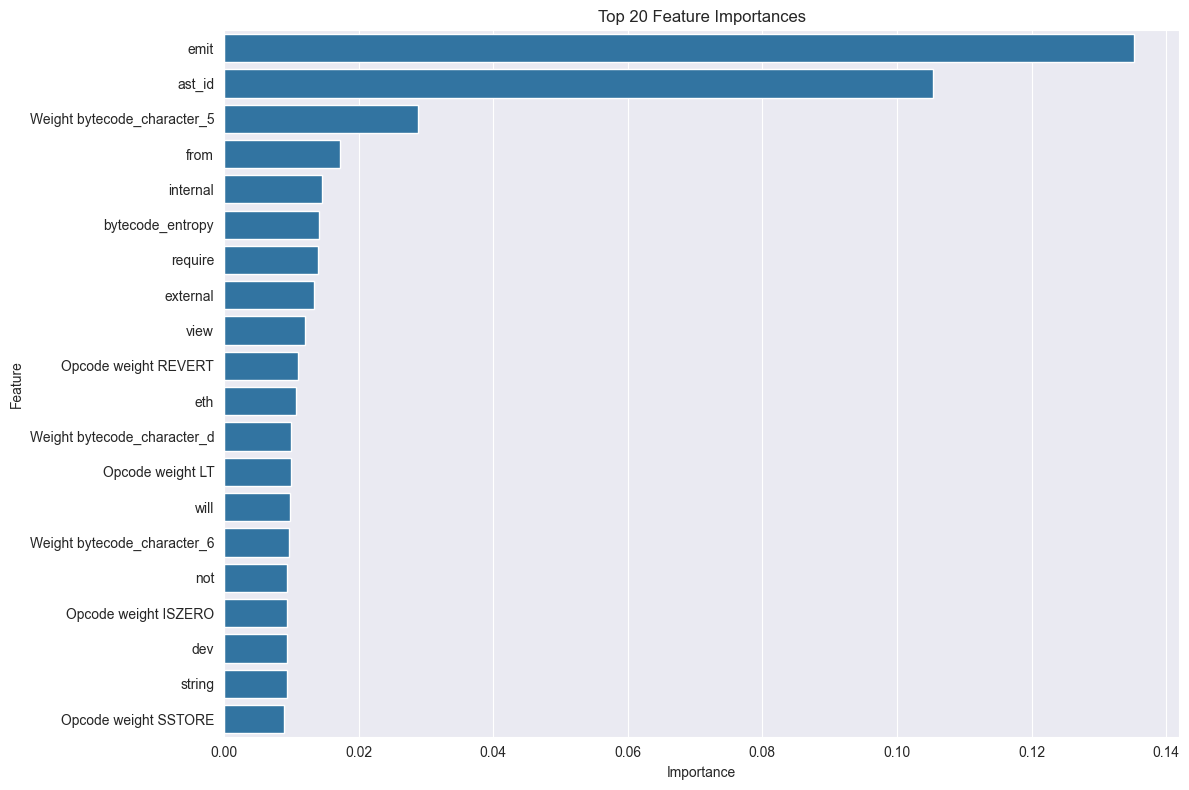

In [13]:
feature_importances = decision_tree.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()

#### Criação de um Scaler

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Criação de um undersampler

In [7]:
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=SEED)

## 6. Teste com todos os modelos trabalhados na disciplina

### Modelo: Árvore de Decisão (agora sem estabelecer profundidade)

In [16]:
decision_tree_model = DecisionTreeClassifier(random_state=SEED) #sem estabelecer profundidade
pipeline_dt = ImbPipeline([
    ('undersampler', undersampler),
    #('scaler', scaler),
    ('decision_tree', decision_tree_model)
])

scores_dt_precision = cross_val_score(pipeline_dt, X_train, y_train, cv=CV_FOLDS, scoring=SCORING_METRIC)

pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.66      0.75      5410
           1       0.42      0.68      0.52      1925

    accuracy                           0.67      7335
   macro avg       0.64      0.67      0.63      7335
weighted avg       0.74      0.67      0.69      7335



### Modelo: Random Forest

In [17]:
random_forest_model = RandomForestClassifier(random_state=SEED)
pipeline_rf = ImbPipeline([
    ('undersampler', undersampler),
    #('scaler', scaler),
    ('random_forest', random_forest_model)
])

scores_dt_precision = cross_val_score(pipeline_rf, X_train, y_train, cv=CV_FOLDS, scoring=SCORING_METRIC)

pipeline_rf.fit(X_train, y_train)
y_pred_dt = pipeline_rf.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      5410
           1       0.49      0.75      0.59      1925

    accuracy                           0.73      7335
   macro avg       0.69      0.74      0.69      7335
weighted avg       0.79      0.73      0.74      7335



### Modelo: KNN

In [18]:
knn_model = KNeighborsClassifier()
pipeline_knn = ImbPipeline([
    ('undersampler', undersampler),
    ('scaler', scaler),
    ('knn', knn_model)
])

scores_dt_precision = cross_val_score(pipeline_knn, X_train, y_train, cv=CV_FOLDS, scoring=SCORING_METRIC)

pipeline_knn.fit(X_train, y_train)
y_pred_dt = pipeline_knn.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.67      0.75      5410
           1       0.42      0.67      0.52      1925

    accuracy                           0.67      7335
   macro avg       0.64      0.67      0.64      7335
weighted avg       0.74      0.67      0.69      7335



### Modelo: Naive Bayes

In [15]:
naive_bayes_model = GaussianNB()

pipeline_nb = ImbPipeline([
    ('undersampler', undersampler),
    ('scaler', scaler),
    ('naive_bayes', naive_bayes_model)
])

scores_dt_precision = cross_val_score(pipeline_nb, X_train, y_train, cv=CV_FOLDS, scoring=SCORING_METRIC)

pipeline_nb.fit(X_train, y_train)
y_pred_dt = pipeline_nb.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.00      0.01      5410
           1       0.26      1.00      0.42      1925

    accuracy                           0.26      7335
   macro avg       0.59      0.50      0.21      7335
weighted avg       0.74      0.26      0.11      7335



## 7. Redução da dimensionalidade por feactures mais importantes
Faço uma redução de dimensionalidade a partir das feactures mais importantes da árvore de decisão
Observação: não consegui rodar SVM com todos os dados
Defini o número 15 arbitrariamente

In [ ]:
top_15_features = feature_importance_df.sort_values(by='importance', ascending=False)['feature'].head(15).tolist()

X_train_filtered = X_train[top_15_features]
X_test_filtered = X_test[top_15_features]

X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

### Modelo: SVM kernel rbf com redução da dimensionalidade

In [19]:
svm_model = SVC(kernel='rbf', random_state=SEED, gamma='scale')

pipeline_svm = ImbPipeline([
    #('undersampler', undersampler),
    #('scaler', scaler),
    ('svm', svm_model)
])

# Validação cruzada
scores_dt_precision = cross_val_score(pipeline_svm, X_train_scaled, y_train, cv=CV_FOLDS, scoring=SCORING_METRIC)

# Treinamento e avaliação final
pipeline_svm.fit(X_train_scaled, y_train)
y_pred_dt = pipeline_svm.predict(X_test_scaled)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      5410
           1       0.71      0.20      0.31      1925

    accuracy                           0.77      7335
   macro avg       0.74      0.58      0.58      7335
weighted avg       0.76      0.77      0.72      7335



### Modelo: SVM kernel linear com redução da dimensionalidade

In [20]:
svm_model = SVC(kernel='linear', random_state=SEED, gamma='scale')

pipeline_svm = ImbPipeline([
    #('undersampler', undersampler),
    #('scaler', scaler),
    ('svm', svm_model)
])

# Validação cruzada
scores_dt_precision = cross_val_score(pipeline_svm, X_train_scaled, y_train, cv=CV_FOLDS, scoring=SCORING_METRIC)

# Treinamento e avaliação final
pipeline_svm.fit(X_train_scaled, y_train)
y_pred_dt = pipeline_svm.predict(X_test_scaled)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      5410
           1       0.74      0.08      0.14      1925

    accuracy                           0.75      7335
   macro avg       0.74      0.53      0.50      7335
weighted avg       0.75      0.75      0.67      7335



### Modelo: SVM kernel poly com redução da dimensionalidade

In [21]:
svm_model = SVC(kernel='poly', random_state=SEED, degree=3, gamma='scale')

pipeline_svm = ImbPipeline([
    #('undersampler', undersampler),
    #('scaler', scaler),
    ('svm', svm_model)
])

# Validação cruzada
scores_dt_precision = cross_val_score(pipeline_svm, X_train_scaled, y_train, cv=CV_FOLDS, scoring=SCORING_METRIC)

# Treinamento e avaliação final
pipeline_svm.fit(X_train_scaled, y_train)
y_pred_dt = pipeline_svm.predict(X_test_scaled)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      5410
           1       0.76      0.14      0.23      1925

    accuracy                           0.76      7335
   macro avg       0.76      0.56      0.54      7335
weighted avg       0.76      0.76      0.69      7335



### Modelo: SVM kernel sigmoid com redução da dimensionalidade

In [22]:
svm_model = SVC(kernel='sigmoid', random_state=SEED, gamma='scale')

pipeline_svm = ImbPipeline([
    #('undersampler', undersampler),
    #('scaler', scaler),
    ('svm', svm_model)
])

# Validação cruzada
scores_dt_precision = cross_val_score(pipeline_svm, X_train_scaled, y_train, cv=CV_FOLDS, scoring=SCORING_METRIC)

# Treinamento e avaliação final
pipeline_svm.fit(X_train_scaled, y_train)
y_pred_dt = pipeline_svm.predict(X_test_scaled)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      5410
           1       0.37      0.35      0.36      1925

    accuracy                           0.67      7335
   macro avg       0.57      0.57      0.57      7335
weighted avg       0.67      0.67      0.67      7335



## 8. Redução da dimensionalidade por PCA

In [8]:
pca = PCA(n_components=0.65, random_state=SEED)
pca.fit(X_train)
X_train_pca_scaled = pca.fit_transform(X_train_scaled)
X_test_pca_scaled = pca.transform(X_test_scaled)

# 1. Número de componentes selecionados
print(f"Número de componentes selecionados pelo PCA: {pca.n_components_}")

Número de componentes selecionados pelo PCA: 30


In [17]:
# 2. Variância explicada por cada componente
print("\nVariância explicada por cada componente:")
print(pca.explained_variance_ratio_)


Variância explicada por cada componente:
[0.12681659 0.08977307 0.08537061 0.04429501 0.03121668 0.02569885
 0.02438584 0.02322593 0.02102522 0.02065002 0.01712045 0.01646274
 0.01344884 0.01275917 0.01124491 0.01100518 0.00846117 0.0077504
 0.00656698 0.00622055 0.00552856 0.00527734 0.00485006 0.00481348
 0.00473134 0.00468287 0.00465207 0.00461119 0.00454873 0.00453822]


In [18]:
# 3. Variância explicada acumulada
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(f"\nVariância explicada acumulada pelos componentes: {cumulative_explained_variance[-1]:.4f}")


Variância explicada acumulada pelos componentes: 0.6517


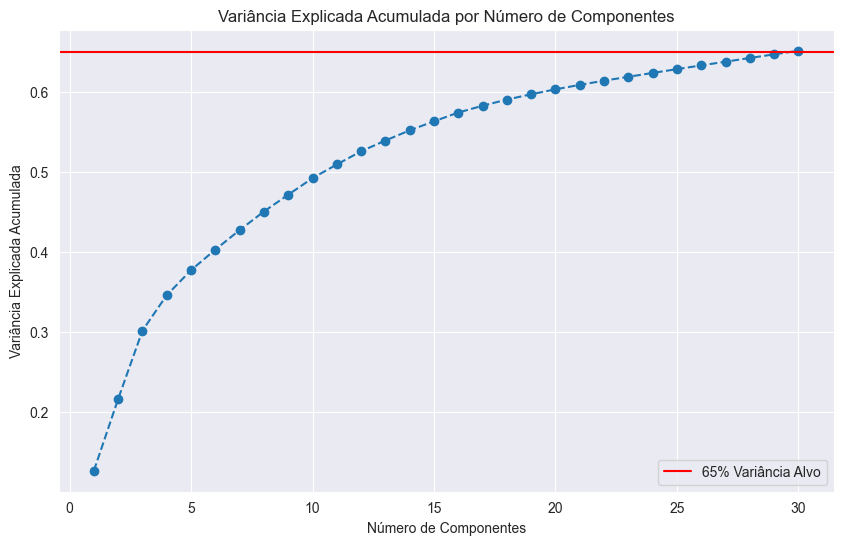

In [21]:
# 4. Visualizar a variância explicada acumulada
# Isso mostra quantos componentes são necessários para explicar uma certa quantidade de variância
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Variância Explicada Acumulada por Número de Componentes')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.axhline(y=0.65, color='r', linestyle='-', label='65% Variância Alvo')  # Mostra seu alvo de 0.80
plt.legend()
plt.show()

### Modelo: Árvore de decisão com PCA

In [11]:
decision_tree_pca_scaled = DecisionTreeClassifier(
    max_depth=20,
    class_weight="balanced",
    random_state=SEED
)

scores_dt_precision = cross_val_score(decision_tree_pca_scaled, X_train_pca_scaled, y_train, cv=CV_FOLDS, scoring=SCORING_METRIC)

decision_tree_pca_scaled.fit(X_train_pca_scaled, y_train)
y_pred_pca_scaled = decision_tree_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test, y_pred_pca_scaled))


              precision    recall  f1-score   support

           0       0.81      0.76      0.79      5410
           1       0.43      0.49      0.46      1925

    accuracy                           0.69      7335
   macro avg       0.62      0.63      0.62      7335
weighted avg       0.71      0.69      0.70      7335



### Modelo: KNN com PCA

In [12]:
knn_model_pca_scaled = KNeighborsClassifier()

scores_dt_precision = cross_val_score(knn_model_pca_scaled, X_train_pca_scaled, y_train, cv=CV_FOLDS, scoring=SCORING_METRIC)

knn_model_pca_scaled.fit(X_train_pca_scaled, y_train)
y_pred_pca_scaled = knn_model_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test, y_pred_pca_scaled))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      5410
           1       0.53      0.40      0.46      1925

    accuracy                           0.75      7335
   macro avg       0.67      0.64      0.65      7335
weighted avg       0.73      0.75      0.74      7335



### Modelo: SVM com PCA

In [9]:
svm_model = SVC(kernel='poly', random_state=SEED, degree=3, gamma='scale')

svm_model.fit(X_train_pca_scaled, y_train)
y_pred_svm_pca = svm_model.predict(X_test_pca_scaled)
print(classification_report(y_test, y_pred_svm_pca))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      5410
           1       0.64      0.07      0.13      1925

    accuracy                           0.75      7335
   macro avg       0.69      0.53      0.49      7335
weighted avg       0.72      0.75      0.66      7335



## 9. Conclusões